In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import plotly.express as px

# №1

In [ ]:
def load_dataset(hrf):
    data = []
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            reader = csv.reader(file, delimiter=';')

            rows = list(reader)
            print(f"Размер: {len(rows)} строк")

            for row in rows:
                numeric_row = []
                for value in row:
                    try:
                        numeric_row.append(float(value))
                    except ValueError:
                        numeric_row.append(0)
                data.append(numeric_row)
    except FileNotFoundError:
        print("Файл dataset.csv не найден")
        return []
df = pd.read_csv('Датасет CSV.csv', sep = ";")

In [ ]:
df.isna().sum()

,0
"Какой у вас телефон? (Айфон - 1, Андроид - 2)",0
"Пол (М - 1, Ж - 2)",0
Количество братьев/сестёр (укажите цифру),0
"ОС на ПК (MacOS - 1, Windows - 2, Linux - 3)",0
Среднее кол-во поездок на такси в месяц (укажите цифру),0
"Играете в мобильные игры? (Да -1, Нет - 2)",0
"Область проживания ( в пределах садового - 1, ттк - 2, мцк - 3, мкад - 4, цкад - 5, московское большое кольцо - 6, дальше - 7",0
"Важно ли качество камеры? (Да - 1, Нет - 2)",0
Из какого ФО вы приехали ( цифры в порядке расположения списка на картинке),0
"Чаще вы оплачиваете покупки... (картой - 1, стикером - 2, NFC - 3, наличными - 4, QR - 5)",0


In [ ]:
len(df.index)

33

In [ ]:
df.head()

,"Какой у вас телефон? (Айфон - 1, Андроид - 2)","Пол (М - 1, Ж - 2)",Количество братьев/сестёр (укажите цифру),"ОС на ПК (MacOS - 1, Windows - 2, Linux - 3)",Среднее кол-во поездок на такси в месяц (укажите цифру),"Играете в мобильные игры? (Да -1, Нет - 2)","Область проживания ( в пределах садового - 1, ттк - 2, мцк - 3, мкад - 4, цкад - 5, московское большое кольцо - 6, дальше - 7","Важно ли качество камеры? (Да - 1, Нет - 2)",Из какого ФО вы приехали ( цифры в порядке расположения списка на картинке),"Чаще вы оплачиваете покупки... (картой - 1, стикером - 2, NFC - 3, наличными - 4, QR - 5)",...,"Ваше положение (безработный - 1, частная компания - 2, госкомпания - 3)","Пользуешься ли технологией умного дома? (Да - 1, Нет - 2)","Сфера работы IT? (Да - 1, Нет - 2)","Какие часы? (Нет часов - 1, Механические - 2, Электронные - 3)",Какой максимальный бюджет готов потратить? (Введи число без пробелов),Сколько раз в день заряжаешь телефон? (Введи цифру),"Каким браузером чаще пользуешься? (Google - 1, Яндекс - 2, Safari - 3, Opera - 4, Edge - 5, Firefox - 6)","Любите ли вы новые технологии? ( по шкале от 1 до 5, где 1 - вообще не люблю, 3 - спокойно отношусь, а 5 - обожаю)","Важна ли для вас возможность настройки интерфейса под себя? (Да - 1, Нет - 2)","Важно ли для вас качество материалов/материал корпуса? (Да -1, Нет - 2)"
0,1,1,1,1,20,1,5,1,1,1,...,2,2,2,2,120000,2,2,4,2,1
1,1,2,0,2,15,2,4,1,6,1,...,2,2,1,3,120000,1,3,3,2,1
2,1,1,2,1,1,2,4,1,1,1,...,3,1,1,3,100000,2,2,5,1,1
3,2,1,0,1,0,2,7,1,1,1,...,2,1,1,3,30000,1,1,5,1,1
4,1,1,0,1,0,2,4,1,1,1,...,3,2,1,3,90000,1,1,4,1,1


# №2

<BarContainer object of 2 artists>

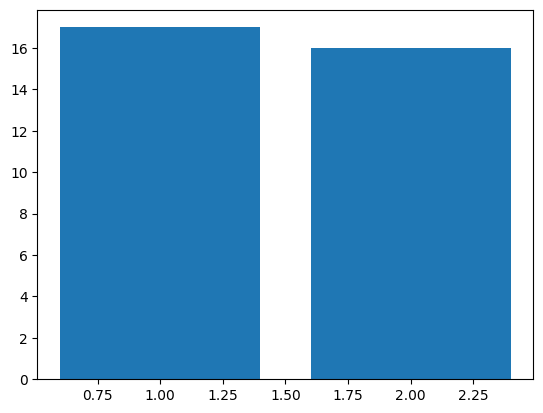

In [ ]:
plt.bar(df['Какой у вас телефон? (Айфон - 1, Андроид - 2)'].unique(), df['Какой у вас телефон? (Айфон - 1, Андроид - 2)'].value_counts().values)

In [ ]:
predictors = df.drop(columns=['Какой у вас телефон? (Айфон - 1, Андроид - 2)','Пол (М - 1, Ж - 2)'])
target = df['Какой у вас телефон? (Айфон - 1, Андроид - 2)']
names = df['Какой у вас телефон? (Айфон - 1, Андроид - 2)'].unique()

In [ ]:
predictors.head()

,Количество братьев/сестёр (укажите цифру),"ОС на ПК (MacOS - 1, Windows - 2, Linux - 3)",Среднее кол-во поездок на такси в месяц (укажите цифру),"Играете в мобильные игры? (Да -1, Нет - 2)","Область проживания ( в пределах садового - 1, ттк - 2, мцк - 3, мкад - 4, цкад - 5, московское большое кольцо - 6, дальше - 7","Важно ли качество камеры? (Да - 1, Нет - 2)",Из какого ФО вы приехали ( цифры в порядке расположения списка на картинке),"Чаще вы оплачиваете покупки... (картой - 1, стикером - 2, NFC - 3, наличными - 4, QR - 5)",Как часто меняете телефон? (укажите среднее количество лет),"Ваше положение (безработный - 1, частная компания - 2, госкомпания - 3)","Пользуешься ли технологией умного дома? (Да - 1, Нет - 2)","Сфера работы IT? (Да - 1, Нет - 2)","Какие часы? (Нет часов - 1, Механические - 2, Электронные - 3)",Какой максимальный бюджет готов потратить? (Введи число без пробелов),Сколько раз в день заряжаешь телефон? (Введи цифру),"Каким браузером чаще пользуешься? (Google - 1, Яндекс - 2, Safari - 3, Opera - 4, Edge - 5, Firefox - 6)","Любите ли вы новые технологии? ( по шкале от 1 до 5, где 1 - вообще не люблю, 3 - спокойно отношусь, а 5 - обожаю)","Важна ли для вас возможность настройки интерфейса под себя? (Да - 1, Нет - 2)","Важно ли для вас качество материалов/материал корпуса? (Да -1, Нет - 2)"
0,1,1,20,1,5,1,1,1,3,2,2,2,2,120000,2,2,4,2,1
1,0,2,15,2,4,1,6,1,3,2,2,1,3,120000,1,3,3,2,1
2,2,1,1,2,4,1,1,1,7,3,1,1,3,100000,2,2,5,1,1
3,0,1,0,2,7,1,1,1,3,2,1,1,3,30000,1,1,5,1,1
4,0,1,0,2,4,1,1,1,4,3,2,1,3,90000,1,1,4,1,1


In [ ]:
print("\n\nЦелевая переменная")
target.head()



Целевая переменная


,"Какой у вас телефон? (Айфон - 1, Андроид - 2)"
0,1
1,1
2,1
3,2
4,1


# №3

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size=0.8, random_state=271)
print(' Размер для признаков обучающей выборки',x_train.shape, '\n',
      'Размер для признаков тестовой выборки',x_test.shape, '\n',
      'Размер для целевого показателя обучающей выборки',y_train.shape, '\n',
      'Размер для показателя тестовой выборки',y_test.shape)

 Размер для признаков обучающей выборки (26, 19) 
 Размер для признаков тестовой выборки (7, 19) 
 Размер для целевого показателя обучающей выборки (26,) 
 Размер для показателя тестовой выборки (7,)


# Классификация методом k-ближних

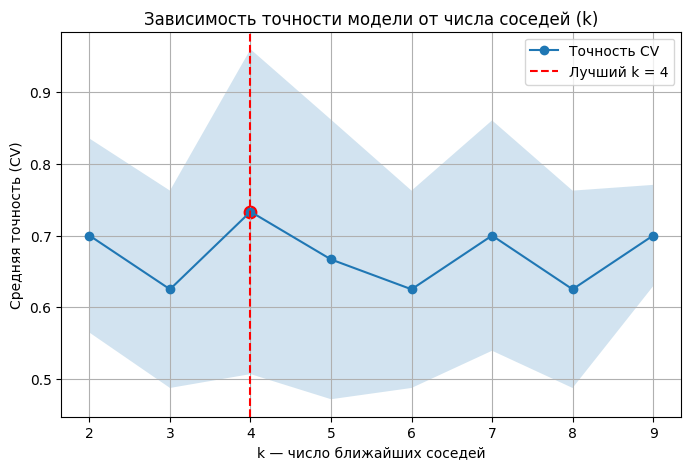

In [18]:
from warnings import simplefilter

number_of_neighbors = np.arange(2,10)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors": number_of_neighbors}
grid_search_knn = GridSearchCV(estimator = model_KNN, param_grid=params, cv=6)

simplefilter(action='ignore', category=FutureWarning)
grid_search_knn.fit(x_train, y_train)

import matplotlib.pyplot as plt
import numpy as np

# Извлекаем результаты поиска
cvres = grid_search_knn.cv_results_

k = cvres["param_n_neighbors"].data.astype(int)
mean_test = cvres["mean_test_score"]
std_test = cvres["std_test_score"]

best_k = grid_search_knn.best_params_["n_neighbors"]
best_score = grid_search_knn.best_score_

# Строим график зависимости точности от k
plt.figure(figsize=(8,5))
plt.plot(k, mean_test, marker="o", label="Точность CV")
plt.fill_between(k, mean_test - std_test, mean_test + std_test, alpha=0.2)
plt.axvline(best_k, linestyle="--", color="red", label=f"Лучший k = {best_k}")
plt.scatter([best_k], [best_score], s=80, color="red")

plt.title("Зависимость точности модели от числа соседей (k)")
plt.xlabel("k — число ближайших соседей")
plt.ylabel("Средняя точность (CV)")
plt.xticks(k)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
grid_search_knn.best_score_

np.float64(0.7333333333333334)

In [20]:
best_model = grid_search_knn.best_estimator_
best_model


KNeighborsClassifier(n_neighbors=np.int64(4))

In [ ]:
knn_preds = grid_search_knn.predict(x_test)

In [ ]:
print(classification_report(knn_preds, y_test))

              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.50      1.00      0.67         2

    accuracy                           0.71         7
   macro avg       0.75      0.80      0.71         7
weighted avg       0.86      0.71      0.73         7



## Выводы:


In [ ]:
print("Методом k-ближних мы можем увидеть, какой телефон выберет человек в зависимости от пола с точность 0.73, а именно 0.67 для Ж и 0.75 для М.")

Методом k-ближних мы можем увидеть, какой телефон выберет человек в зависимости от пола с точность 0.73, а именно 0.67 для Ж и 0.75 для М.
